What are the reasons behind missing data?
Missing data can occur due to many reasons. The data is collected from various sources and, while mining the data, there is a chance to lose the data. However, most of the time cause for missing data is item nonresponse, which means people are not willing(Due to a lack of knowledge about the question ) to answer the questions in a survey, and some people unwillingness to react to sensitive questions like age, salary, gender.

Types of Missing data
Before dealing with the missing values, it is necessary to understand the category of missing values. There are 3 major categories of missing values.

Missing Completely at Random(MCAR):
A variable is missing completely at random (MCAR)if the missing values on a given variable (Y) don’t have a relationship with other variables in a given data set or with the variable (Y) itself. In other words, When data is MCAR, there is no relationship between the data missing and any values, and there is no particular reason for the missing values.

This article was published as a part of the Data Science Blogathon
Overview of Missing Data
Real-world data is messy and usually holds a lot of missing values. Missing data can skew anything for data scientists and, A data scientist doesn’t want to design biased estimates that point to invalid results. Behind, any analysis is only as great as the data. Missing data appear when no value is available in one or more variables of an individual. Due to Missing data, the statistical power of the analysis can reduce, which can impact the validity of the results.

This article will help you to a guild the following topics.

The reason behind missing data?
What are the types of missing data?
Missing Completely at Random (MCAR)
Missing at Random (MAR)
Missing Not at Random (MNAR)
Detecting Missing values
Detecting missing values numerically
Detecting missing data visually using Missingno library
Finding relationship among missing data
Using matrix plot
Using a Heatmap
Treating Missing values
Deletions
Pairwise Deletion
Listwise Deletion/ Dropping rows
Dropping complete columns
Basic Imputation Techniques
Imputation with a constant value
Imputation using the statistics (mean, median, mode)
K-Nearest Neighbor Imputation
let’s start…..

What are the reasons behind missing data?
Missing data can occur due to many reasons. The data is collected from various sources and, while mining the data, there is a chance to lose the data. However, most of the time cause for missing data is item nonresponse, which means people are not willing(Due to a lack of knowledge about the question ) to answer the questions in a survey, and some people unwillingness to react to sensitive questions like age, salary, gender.

Types of Missing data
Before dealing with the missing values, it is necessary to understand the category of missing values. There are 3 major categories of missing values.

Missing Completely at Random(MCAR):
A variable is missing completely at random (MCAR)if the missing values on a given variable (Y) don’t have a relationship with other variables in a given data set or with the variable (Y) itself. In other words, When data is MCAR, there is no relationship between the data missing and any values, and there is no particular reason for the missing values.


Missing at Random(MAR):
Let’s understands the following examples:
Women are less likely to talk about age and weight than men.
Men are less likely to talk about salary and emotions than women.
familiar right?… This sort of missing content indicates missing at random.
MAR occurs when the missingness is not random, but there is a systematic relationship between missing values and other observed data but not the missing data.

Missing Not at Random(MNAR):
The final and most difficult situation of missingness. MNAR occurs when the missingness is not random, and there is a systematic relationship between missing value, observed value, and missing itself. 

In [2]:
pip install seaborn

     -------------------------------------- 292.8/292.8 KB 3.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\AmitSureshSonawane\miniconda3\python.exe -m pip install --upgrade pip' command.


In [3]:
#Detecting missing values numerically: First, detect the percentage of missing values in every column of the dataset will give an idea about the distribution of missing values.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

train = pd.read_csv("Train.csv")

mis_val =train.isna().sum()
mis_val_per = train.isna().sum()/len(train)*100
mis_val_table = pd.concat([mis_val, mis_val_per], axis=1)
mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
mis_val_table_ren_columns = mis_val_table_ren_columns[
       mis_val_table_ren_columns.iloc[:,:] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
mis_val_table_ren_columns

,Missing Values,% of Total Values
Outlet_Size,2410.0,28.3
Item_Weight,1463.0,17.2
Item_Identifier,NaN,NaN
Item_Fat_Content,NaN,NaN
Item_Visibility,NaN,NaN
Item_Type,NaN,NaN
Item_MRP,NaN,NaN
Outlet_Identifier,NaN,NaN
Outlet_Establishment_Year,NaN,NaN
Outlet_Location_Type,NaN,NaN


In [ ]:
#
train.shape

Imputation with constant value:
As the title hints — it replaces the missing values with either zero or any constant value.
We will use the SimpleImputer class from sklearn.

In [4]:
from sklearn.impute import SimpleImputer
train_constant = train.copy()
#setting strategy to 'constant' 
mean_imputer = SimpleImputer(strategy='constant') # imputing using constant value
train_constant.iloc[:,:] = mean_imputer.fit_transform(train_constant)
train_constant.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

Imputation using Statistics:
The syntax is the same as imputation with constant only the SimpleImputer strategy will change. It can be “Mean” or “Median” or “Most_Frequent”.

In [5]:
#Before using any strategy, the foremost step is to check the type of data and distribution of features(if numeric).

train['Item_Weight'].dtype

dtype('float64')

c:\Users\AmitSureshSonawane\miniconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


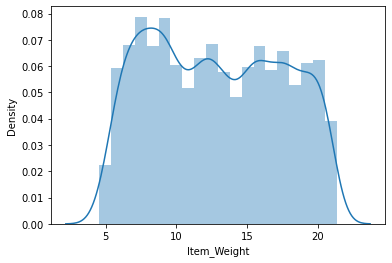

In [6]:
sns.distplot(train['Item_Weight'])

Item_Weight column satisfying both conditions numeric type and doesn’t have skewed(follow Gaussian distribution). here, we can use any strategy.

In [7]:
from sklearn.impute import SimpleImputer
train_most_frequent = train.copy()
#setting strategy to 'mean' to impute by the mean
mean_imputer = SimpleImputer(strategy='most_frequent')# strategy can also be mean or median 
train_most_frequent.iloc[:,:] = mean_imputer.fit_transform(train_most_frequent)
train_most_frequent.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

K_Nearest Neighbor Imputation:

The KNN algorithm helps to impute missing data by finding the closest neighbors using the Euclidean distance metric to the observation with missing data and imputing them based on the non-missing values in the neighbors.

In [8]:
train_knn = train.copy(deep=True)
from sklearn.impute import KNNImputer
knn_imputer = KNNImputer(n_neighbors=2, weights="uniform")
train_knn['Item_Weight'] = knn_imputer.fit_transform(train_knn[['Item_Weight']])
train_knn['Item_Weight'].isnull().sum()

0

We use imputation because Missing data can cause the below issues: –

Incompatible with most of the Python libraries used in Machine Learning:- Yes, you read it right. While using the libraries for ML(the most common is skLearn), they don’t have a provision to automatically handle these missing data and can lead to errors.
Distortion in Dataset:- A huge amount of missing data can cause distortions in the variable distribution i.e it can increase or decrease the value of a particular category in the dataset.
Affects the Final Model:- the missing data can cause a bias in the dataset and can lead to a faulty analysis by the model.
Another and the most important reason is “We want to restore the complete dataset”. This is mostly in the case when we do not want to lose any(more of) data from our dataset as all of it is important, & secondly, dataset size is not very big, and removing some part of it can have a significant impact on the final model.